In [3]:
import pandas as pd
import statsmodels.api as sm

In [4]:
df = pd.read_excel('./data_files/returns.xlsx')

print(df)

          date  CH0506071106  CH0419041436  CH0444153792  CH0184636915  \
0   2015-01-31           NaN           NaN           NaN           NaN   
1   2015-02-28           NaN           NaN           NaN           NaN   
2   2015-03-31           NaN           NaN           NaN           NaN   
3   2015-04-30           NaN           NaN           NaN           NaN   
4   2015-05-31           NaN           NaN           NaN           NaN   
..         ...           ...           ...           ...           ...   
115 2024-08-31           NaN           NaN           NaN           NaN   
116 2024-09-30           NaN           NaN           NaN           NaN   
117 2024-10-31           NaN           NaN           NaN           NaN   
118 2024-11-30           NaN           NaN           NaN           NaN   
119 2024-12-31           NaN           NaN           NaN           NaN   

     CH0301832561  CH0379354225  CH0262085076  CH0522158945  CH0506071288  \
0             NaN           NaN   

In [5]:
df_clean = df.melt(id_vars="date", value_vars=df[1:529], var_name="isin", value_name="stock_return")
print(df_clean)

            date          isin  stock_return
0     2015-01-31  CH0506071106           NaN
1     2015-02-28  CH0506071106           NaN
2     2015-03-31  CH0506071106           NaN
3     2015-04-30  CH0506071106           NaN
4     2015-05-31  CH0506071106           NaN
...          ...           ...           ...
63475 2024-08-31  CH0247611269           NaN
63476 2024-09-30  CH0247611269           NaN
63477 2024-10-31  CH0247611269           NaN
63478 2024-11-30  CH0247611269           NaN
63479 2024-12-31  CH0247611269           NaN

[63480 rows x 3 columns]


In [6]:
# Assume your full firm-level dataset is called `firm_df`
df_clean['type_of_firm'] = df_clean['stock_return'].apply(
    lambda x: 'Public' if pd.notnull(x) else 'Private'
)

In [7]:
print(df_clean.head())

        date          isin  stock_return type_of_firm
0 2015-01-31  CH0506071106           NaN      Private
1 2015-02-28  CH0506071106           NaN      Private
2 2015-03-31  CH0506071106           NaN      Private
3 2015-04-30  CH0506071106           NaN      Private
4 2015-05-31  CH0506071106           NaN      Private


In [8]:
df_clean.isna().sum()

date                0
isin                0
stock_return    39626
type_of_firm        0
dtype: int64

In [9]:
stock_ret_df = df_clean.dropna()

print(stock_ret_df.head())

           date          isin  stock_return type_of_firm
1320 2015-01-31  CH1168499775     -0.162252       Public
1321 2015-02-28  CH1168499775      0.154715       Public
1322 2015-03-31  CH1168499775      0.008802       Public
1323 2015-04-30  CH1168499775     -0.002424       Public
1324 2015-05-31  CH1168499775     -0.000972       Public


In [10]:
stock_ret_df['isin'] = pd.factorize(stock_ret_df['isin'])[0]

/var/folders/dw/93tk385j54q9dmq3f082vbnm0000gn/T/ipykernel_45435/4050088097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_ret_df['isin'] = pd.factorize(stock_ret_df['isin'])[0]


In [11]:
working_df = pd.read_csv("working_sample_1.csv")

In [12]:
# Ensure the 'date' column in both DataFrames is of the same type
working_df['date'] = pd.to_datetime(working_df['date'])
stock_ret_df['date'] = pd.to_datetime(stock_ret_df['date'])

working_df= working_df.drop(columns='Unnamed: 0')
# Perform the merge
working_df_new = working_df.merge(stock_ret_df, on=['date', 'isin'], how="left")
print(working_df_new)

            date  isin  cs_change  delta lr  change_in_10y_bond  \
0     2022-11-30     0   -0.00267  0.000058            -0.00028   
1     2022-12-31     0   -0.00102  0.000058             0.00517   
2     2023-01-31     0   -0.00020  0.000024            -0.00310   
3     2023-02-28     0    0.00077  0.000024             0.00167   
4     2023-03-31     0    0.00259  0.000024            -0.00229   
...          ...   ...        ...       ...                 ...   
36215 2024-08-31   527    0.00001  0.000040             0.00007   
36216 2024-09-30   527    0.00016  0.000040            -0.00054   
36217 2024-10-31   527   -0.00030  0.000040             0.00007   
36218 2024-11-30   527   -0.00011  0.000040            -0.00177   
36219 2024-12-31   527   -0.00010  0.000040             0.00075   

       change_in_slope  smi_return  v3x_change rating  maturity  cpi_change  \
0             -0.00395    0.027314   -0.030361    AAA      10.0      0.0040   
1              0.00171   -0.036456   

/var/folders/dw/93tk385j54q9dmq3f082vbnm0000gn/T/ipykernel_45435/2612099150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_ret_df['date'] = pd.to_datetime(stock_ret_df['date'])


In [13]:
working_df_new.isna().sum()

date                         0
isin                         0
cs_change                    0
delta lr                     0
change_in_10y_bond           0
change_in_slope              0
smi_return                   0
v3x_change                   0
rating                       0
maturity                     0
cpi_change                   0
unempl_change                0
gdp_change                   0
liquidity                    0
credit_rating_numeric        0
rating_class                 0
maturity_bucket              0
stock_return             22552
type_of_firm             22552
dtype: int64

In [14]:
working_df_new.to_csv("public.csv")

In [15]:
working_df_new2 = working_df_new.dropna()

print(working_df_new2.head())

        date  isin  cs_change  delta lr  change_in_10y_bond  change_in_slope  \
0 2022-11-30     0   -0.00267  0.000058            -0.00028         -0.00395   
1 2022-12-31     0   -0.00102  0.000058             0.00517          0.00171   
2 2023-01-31     0   -0.00020  0.000024            -0.00310         -0.00158   
3 2023-02-28     0    0.00077  0.000024             0.00167         -0.00069   
4 2023-03-31     0    0.00259  0.000024            -0.00229         -0.00179   

   smi_return  v3x_change rating  maturity  cpi_change  unempl_change  \
0    0.027314   -0.030361    AAA      10.0      0.0040            0.1   
1   -0.036456   -0.005036    AAA      10.0     -0.2283            0.1   
2    0.050557    0.005429    AAA      10.0      0.6286            0.1   
3   -0.016747   -0.001126    AAA      10.0      0.7838            0.0   
4    0.000710   -0.016202    AAA      10.0      0.1623           -0.1   

   gdp_change  liquidity  credit_rating_numeric     rating_class  \
0    0.26050

In [16]:
working_df_new2.to_csv("working_sample_2.csv")

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

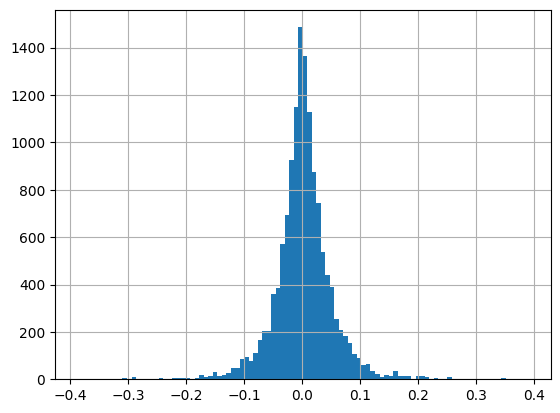

In [18]:
working_df_new2['stock_return'].hist(bins=100)
plt.show()

In [19]:
def classify_return(r):
    if r > 0.02:
        return 'High'
    elif r < -0.02:
        return 'Low'
    else:
        return 'Medium'

working_df_new2['return_bucket'] = working_df_new2['stock_return'].apply(classify_return)


/var/folders/dw/93tk385j54q9dmq3f082vbnm0000gn/T/ipykernel_45435/2397762274.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df_new2['return_bucket'] = working_df_new2['stock_return'].apply(classify_return)


In [20]:
print(working_df_new2.head())

        date  isin  cs_change  delta lr  change_in_10y_bond  change_in_slope  \
0 2022-11-30     0   -0.00267  0.000058            -0.00028         -0.00395   
1 2022-12-31     0   -0.00102  0.000058             0.00517          0.00171   
2 2023-01-31     0   -0.00020  0.000024            -0.00310         -0.00158   
3 2023-02-28     0    0.00077  0.000024             0.00167         -0.00069   
4 2023-03-31     0    0.00259  0.000024            -0.00229         -0.00179   

   smi_return  v3x_change rating  maturity  cpi_change  unempl_change  \
0    0.027314   -0.030361    AAA      10.0      0.0040            0.1   
1   -0.036456   -0.005036    AAA      10.0     -0.2283            0.1   
2    0.050557    0.005429    AAA      10.0      0.6286            0.1   
3   -0.016747   -0.001126    AAA      10.0      0.7838            0.0   
4    0.000710   -0.016202    AAA      10.0      0.1623           -0.1   

   gdp_change  liquidity  credit_rating_numeric     rating_class  \
0    0.26050

### All maturities

In [21]:
results_by_stock_ret = {}
r_squared_table = {}

coef_table = pd.DataFrame()
for group_name, group_data in working_df_new2.groupby('return_bucket'):
    y_group = group_data['cs_change']
    x_group = group_data[['delta lr', 'change_in_10y_bond', 'change_in_slope', 'smi_return', 'v3x_change', 'cpi_change', 'unempl_change', 'gdp_change','liquidity']]
    x_group = sm.add_constant(x_group) 
    
    model = sm.OLS(y_group, x_group).fit()
    
    coef = model.params
    coef.name = group_name

    coef_table = pd.concat([coef_table, coef], axis=1)
    
    print(f"\n\nResult for {group_name}")
    print(model.summary)
    print(model.summary())
    results_by_stock_ret[group_name] = model
    
    r_squared_table[group_name] = model.rsquared
    

coef_table = coef_table.T



Result for High
<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x13c875e20>>
                            OLS Regression Results                            
Dep. Variable:              cs_change   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     37.54
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           1.57e-64
Time:                        14:23:41   Log-Likelihood:                 21353.
No. Observations:                3987   AIC:                        -4.269e+04
Df Residuals:                    3977   BIC:                        -4.262e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025   

In [22]:
# Create R² DataFrame
r_squared_table = pd.Series(r_squared_table, name='R_squared')
# Print
print(r_squared_table)

High      0.078308
Low       0.130358
Medium    0.017242
Name: R_squared, dtype: float64


In [23]:
print(coef_table)

           const  delta lr  change_in_10y_bond  change_in_slope  smi_return  \
High   -0.000081  0.000243           -0.181235         0.243020   -0.005277   
Low    -0.000293  0.004426            0.034076         0.096600   -0.002021   
Medium -0.000110  0.002478           -0.102255         0.196486   -0.005451   

        v3x_change  cpi_change  unempl_change  gdp_change  liquidity  
High     -0.002916    0.000536      -0.000371    0.000235  -0.000058  
Low       0.002091    0.001050       0.000211   -0.000072   0.000335  
Medium   -0.001799    0.000559      -0.000084    0.000072   0.000022  


### Medium term

In [24]:
df_medium_term = working_df_new2[working_df_new2['maturity_bucket'] == "Medium-Term"]

print(df_medium_term)

            date  isin  cs_change  delta lr  change_in_10y_bond  \
0     2022-11-30     0   -0.00267  0.000058            -0.00028   
1     2022-12-31     0   -0.00102  0.000058             0.00517   
2     2023-01-31     0   -0.00020  0.000024            -0.00310   
3     2023-02-28     0    0.00077  0.000024             0.00167   
4     2023-03-31     0    0.00259  0.000024            -0.00229   
...          ...   ...        ...       ...                 ...   
13945 2024-08-31   201   -0.00048 -0.000896             0.00007   
13946 2024-09-30   201    0.00029 -0.000896            -0.00054   
13947 2024-10-31   201   -0.00039 -0.000896             0.00007   
13948 2024-11-30   201    0.00002 -0.000896            -0.00177   
13949 2024-12-31   201   -0.00022 -0.000896             0.00075   

       change_in_slope  smi_return  v3x_change rating   maturity  cpi_change  \
0             -0.00395    0.027314   -0.030361    AAA  10.000000      0.0040   
1              0.00171   -0.036456 

In [25]:
results_by_stock_ret = {}
r_squared_table = {}

coef_table = pd.DataFrame()
for group_name, group_data in df_medium_term.groupby('return_bucket'):
    y_group = group_data['cs_change']
    x_group = group_data[['delta lr', 'change_in_10y_bond', 'change_in_slope', 'smi_return', 'v3x_change', 'cpi_change', 'unempl_change', 'gdp_change','liquidity']]
    x_group = sm.add_constant(x_group)
    model1 = sm.OLS(y_group, x_group).fit()
    
    coef = model1.params
    coef.name = group_name

    coef_table = pd.concat([coef_table, coef], axis=1)
    
    print(f"\n\nResult for {group_name}")
    print(model1.summary)
    print(model1.summary())
    results_by_stock_ret[group_name] = model1
    
    r_squared_table[group_name] = model1.rsquared
    

coef_table = coef_table.T



Result for High
<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x13c83a2a0>>
                            OLS Regression Results                            
Dep. Variable:              cs_change   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     30.46
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           4.87e-51
Time:                        14:23:41   Log-Likelihood:                 14285.
No. Observations:                2603   AIC:                        -2.855e+04
Df Residuals:                    2593   BIC:                        -2.849e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025   

In [26]:
r_squared_table = pd.Series(r_squared_table, name='R_squared')
print(r_squared_table)

High      0.095614
Low       0.133684
Medium    0.012425
Name: R_squared, dtype: float64


### Long term 

In [27]:
df_long_term = working_df_new2[working_df_new2['maturity_bucket'] == "Long-Term"]
print(df_long_term)

            date  isin  cs_change  delta lr  change_in_10y_bond  \
121   2022-07-31     3    0.00094 -0.000117            -0.00584   
122   2022-08-31     3    0.00059 -0.000117             0.00363   
123   2022-09-30     3    0.00201 -0.000117             0.00394   
124   2022-10-31     3   -0.00188 -0.000117            -0.00081   
125   2022-11-30     3   -0.00552 -0.000117            -0.00028   
...          ...   ...        ...       ...                 ...   
13874 2024-08-31   200   -0.00046 -0.070502             0.00007   
13875 2024-09-30   200   -0.00003 -0.070502            -0.00054   
13876 2024-10-31   200   -0.00030 -0.070502             0.00007   
13877 2024-11-30   200    0.00036 -0.070502            -0.00177   
13878 2024-12-31   200   -0.00011 -0.070502             0.00075   

       change_in_slope  smi_return  v3x_change rating   maturity  cpi_change  \
121           -0.00517    0.036985   -0.058189    AAA  25.000000     -0.0396   
122           -0.00251   -0.026443 

In [28]:
results_by_stock_ret = {}
r_squared_table = {}

coef_table = pd.DataFrame()
for group_name, group_data in df_long_term.groupby('return_bucket'):
    y_group = group_data['cs_change']
    x_group = group_data[['delta lr', 'change_in_10y_bond', 'change_in_slope', 'smi_return', 'v3x_change', 'cpi_change', 'unempl_change', 'gdp_change','liquidity']]
    x_group = sm.add_constant(x_group)
    model1 = sm.OLS(y_group, x_group).fit()
    
    coef = model1.params
    coef.name = group_name

    coef_table = pd.concat([coef_table, coef], axis=1)
    
    print(f"\n\nResult for {group_name}")
    print(model1.summary)
    print(model1.summary())
    results_by_stock_ret[group_name] = model1
    
    r_squared_table[group_name] = model1.rsquared
    

coef_table = coef_table.T



Result for High
<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x13cb8d1c0>>
                            OLS Regression Results                            
Dep. Variable:              cs_change   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     8.207
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           6.31e-12
Time:                        14:23:41   Log-Likelihood:                 6433.7
No. Observations:                1247   AIC:                        -1.285e+04
Df Residuals:                    1237   BIC:                        -1.280e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025   

In [29]:
r_squared_table = pd.Series(r_squared_table, name='R_squared')
print(r_squared_table)

High      0.056349
Low       0.128584
Medium    0.078282
Name: R_squared, dtype: float64


### Simple regression

In [30]:
X = working_df_new2[['change_in_10y_bond', 'change_in_slope', 'smi_return', 'v3x_change', 'cpi_change', 'unempl_change', 'gdp_change', 'liquidity', 'stock_return', 'delta lr']]
y = working_df_new2['cs_change']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())
print(model.rsquared)

                            OLS Regression Results                            
Dep. Variable:              cs_change   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     45.75
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           1.97e-90
Time:                        14:23:41   Log-Likelihood:                 67446.
No. Observations:               13668   AIC:                        -1.349e+05
Df Residuals:                   13657   BIC:                        -1.348e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0001   2.91

### Some adjustments for panel data

In [31]:
working_df_new2.to_csv("equity_panel.csv")

## Adding market leverage

In [32]:
df_mlev= pd.read_excel('./data_files/lev_market.xlsx')
print(df_mlev)

          date  CH0506071106  CH0419041436  CH0444153792  CH0184636915  \
0   2015-01-31           NaN           NaN           NaN           NaN   
1   2015-02-28           NaN           NaN           NaN           NaN   
2   2015-03-31           NaN           NaN           NaN           NaN   
3   2015-04-30           NaN           NaN           NaN           NaN   
4   2015-05-31           NaN           NaN           NaN           NaN   
..         ...           ...           ...           ...           ...   
115 2024-08-31           NaN           NaN           NaN           NaN   
116 2024-09-30           NaN           NaN           NaN           NaN   
117 2024-10-31           NaN           NaN           NaN           NaN   
118 2024-11-30           NaN           NaN           NaN           NaN   
119 2024-12-31           NaN           NaN           NaN           NaN   

     CH0301832561  CH0379354225  CH0262085076  CH0522158945  CH0506071288  \
0             NaN           NaN   

In [33]:
df_mlev_clean = df_mlev.melt(id_vars="date", value_vars=df[1:529], var_name="isin", value_name="change_in_lmarket")
print(df_mlev_clean)


            date          isin  change_in_lmarket
0     2015-01-31  CH0506071106                NaN
1     2015-02-28  CH0506071106                NaN
2     2015-03-31  CH0506071106                NaN
3     2015-04-30  CH0506071106                NaN
4     2015-05-31  CH0506071106                NaN
...          ...           ...                ...
63475 2024-08-31  CH0247611269                NaN
63476 2024-09-30  CH0247611269                NaN
63477 2024-10-31  CH0247611269                NaN
63478 2024-11-30  CH0247611269                NaN
63479 2024-12-31  CH0247611269                NaN

[63480 rows x 3 columns]


In [34]:
df_mlev_clean.isna().sum()

date                     0
isin                     0
change_in_lmarket    40644
dtype: int64

In [35]:
df_mlev_new= df_mlev_clean.dropna()

print(df_mlev_new)

            date          isin  change_in_lmarket
1320  2015-01-31  CH1168499775           0.179417
1321  2015-02-28  CH1168499775           0.179417
1322  2015-03-31  CH1168499775           0.179417
1323  2015-04-30  CH1168499775           0.179417
1324  2015-05-31  CH1168499775           0.179417
...          ...           ...                ...
60835 2024-08-31  CH0570347341          -0.663300
60836 2024-09-30  CH0570347341          -0.663300
60837 2024-10-31  CH0570347341          -0.663300
60838 2024-11-30  CH0570347341          -0.663300
60839 2024-12-31  CH0570347341          -0.663300

[22836 rows x 3 columns]


In [36]:
df_mlev_new['isin'] = pd.factorize(df_mlev_new['isin'])[0]

/var/folders/dw/93tk385j54q9dmq3f082vbnm0000gn/T/ipykernel_45435/1546285192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mlev_new['isin'] = pd.factorize(df_mlev_new['isin'])[0]


In [37]:
print(working_df_new2)  

            date  isin  cs_change  delta lr  change_in_10y_bond  \
0     2022-11-30     0   -0.00267  0.000058            -0.00028   
1     2022-12-31     0   -0.00102  0.000058             0.00517   
2     2023-01-31     0   -0.00020  0.000024            -0.00310   
3     2023-02-28     0    0.00077  0.000024             0.00167   
4     2023-03-31     0    0.00259  0.000024            -0.00229   
...          ...   ...        ...       ...                 ...   
13945 2024-08-31   201   -0.00048 -0.000896             0.00007   
13946 2024-09-30   201    0.00029 -0.000896            -0.00054   
13947 2024-10-31   201   -0.00039 -0.000896             0.00007   
13948 2024-11-30   201    0.00002 -0.000896            -0.00177   
13949 2024-12-31   201   -0.00022 -0.000896             0.00075   

       change_in_slope  smi_return  v3x_change rating   maturity  cpi_change  \
0             -0.00395    0.027314   -0.030361    AAA  10.000000      0.0040   
1              0.00171   -0.036456 

In [38]:
df_mlev_new['date'] = pd.to_datetime(df_mlev_new['date'])

/var/folders/dw/93tk385j54q9dmq3f082vbnm0000gn/T/ipykernel_45435/1051395667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mlev_new['date'] = pd.to_datetime(df_mlev_new['date'])


In [39]:
working_df_new_3 = working_df_new2.merge(df_mlev_new, on=['date', 'isin'], how="left")
print(working_df_new_3)

            date  isin  cs_change  delta lr  change_in_10y_bond  \
0     2022-11-30     0   -0.00267  0.000058            -0.00028   
1     2022-12-31     0   -0.00102  0.000058             0.00517   
2     2023-01-31     0   -0.00020  0.000024            -0.00310   
3     2023-02-28     0    0.00077  0.000024             0.00167   
4     2023-03-31     0    0.00259  0.000024            -0.00229   
...          ...   ...        ...       ...                 ...   
13663 2024-08-31   201   -0.00048 -0.000896             0.00007   
13664 2024-09-30   201    0.00029 -0.000896            -0.00054   
13665 2024-10-31   201   -0.00039 -0.000896             0.00007   
13666 2024-11-30   201    0.00002 -0.000896            -0.00177   
13667 2024-12-31   201   -0.00022 -0.000896             0.00075   

       change_in_slope  smi_return  v3x_change rating   maturity  ...  \
0             -0.00395    0.027314   -0.030361    AAA  10.000000  ...   
1              0.00171   -0.036456   -0.005036   

In [40]:
working_df_new_3.isna().sum()

date                       0
isin                       0
cs_change                  0
delta lr                   0
change_in_10y_bond         0
change_in_slope            0
smi_return                 0
v3x_change                 0
rating                     0
maturity                   0
cpi_change                 0
unempl_change              0
gdp_change                 0
liquidity                  0
credit_rating_numeric      0
rating_class               0
maturity_bucket            0
stock_return               0
type_of_firm               0
return_bucket              0
change_in_lmarket        676
dtype: int64

In [41]:
working_df_new_4 = working_df_new_3.dropna()
print(working_df_new_4.head())

        date  isin  cs_change  delta lr  change_in_10y_bond  change_in_slope  \
0 2022-11-30     0   -0.00267  0.000058            -0.00028         -0.00395   
1 2022-12-31     0   -0.00102  0.000058             0.00517          0.00171   
2 2023-01-31     0   -0.00020  0.000024            -0.00310         -0.00158   
3 2023-02-28     0    0.00077  0.000024             0.00167         -0.00069   
4 2023-03-31     0    0.00259  0.000024            -0.00229         -0.00179   

   smi_return  v3x_change rating  maturity  ...  unempl_change  gdp_change  \
0    0.027314   -0.030361    AAA      10.0  ...            0.1    0.260500   
1   -0.036456   -0.005036    AAA      10.0  ...            0.1    0.260500   
2    0.050557    0.005429    AAA      10.0  ...            0.1    0.061917   
3   -0.016747   -0.001126    AAA      10.0  ...            0.0    0.061917   
4    0.000710   -0.016202    AAA      10.0  ...           -0.1    0.061917   

   liquidity  credit_rating_numeric     rating_cla

In [42]:
results_by_stock_ret = {}
r_squared_table = {}

coef_table = pd.DataFrame()
for group_name, group_data in working_df_new_4.groupby('return_bucket'):
    y_group = group_data['cs_change']
    x_group = group_data[['change_in_lmarket','change_in_10y_bond', 'change_in_slope', 'smi_return', 'v3x_change', 'cpi_change', 'unempl_change', 'gdp_change','liquidity']]
    x_group = sm.add_constant(x_group) 
    
    model = sm.OLS(y_group, x_group).fit()
    
    coef = model.params
    coef.name = group_name

    coef_table = pd.concat([coef_table, coef], axis=1)
    
    print(f"\n\nResult for {group_name}")
    print(model.summary)
    print(model.summary())
    results_by_stock_ret[group_name] = model
    
    r_squared_table[group_name] = model.rsquared
    

coef_table = coef_table.T



Result for High
<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x13cbd3590>>
                            OLS Regression Results                            
Dep. Variable:              cs_change   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     37.05
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           1.26e-63
Time:                        14:23:41   Log-Likelihood:                 21077.
No. Observations:                3936   AIC:                        -4.213e+04
Df Residuals:                    3926   BIC:                        -4.207e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025   

In [43]:
df_long_term = working_df_new_4[working_df_new_4['maturity_bucket'] == "Long-Term"]

print(df_long_term)

            date  isin  cs_change  delta lr  change_in_10y_bond  \
121   2022-07-31     3    0.00094 -0.000117            -0.00584   
122   2022-08-31     3    0.00059 -0.000117             0.00363   
123   2022-09-30     3    0.00201 -0.000117             0.00394   
124   2022-10-31     3   -0.00188 -0.000117            -0.00081   
125   2022-11-30     3   -0.00552 -0.000117            -0.00028   
...          ...   ...        ...       ...                 ...   
13592 2024-08-31   200   -0.00046 -0.070502             0.00007   
13593 2024-09-30   200   -0.00003 -0.070502            -0.00054   
13594 2024-10-31   200   -0.00030 -0.070502             0.00007   
13595 2024-11-30   200    0.00036 -0.070502            -0.00177   
13596 2024-12-31   200   -0.00011 -0.070502             0.00075   

       change_in_slope  smi_return  v3x_change rating   maturity  ...  \
121           -0.00517    0.036985   -0.058189    AAA  25.000000  ...   
122           -0.00251   -0.026443    0.029616   

In [44]:
results_by_rating = {}
r_squared_table = {}

coef_table = pd.DataFrame()
for group_name, group_data in df_long_term.groupby('rating_class'):
    y_group = group_data['cs_change']
    x_group = group_data[['change_in_lmarket', 'change_in_10y_bond', 'change_in_slope', 'smi_return', 'v3x_change','cpi_change', 'unempl_change', 'gdp_change','liquidity']]
    x_group = sm.add_constant(x_group)
    model1 = sm.OLS(y_group, x_group).fit()
    
    coef = model1.params
    coef.name = group_name

    coef_table = pd.concat([coef_table, coef], axis=1)
    
    print(f"\n\nResult for {group_name}")
    print(model1.summary)
    print(model1.summary())
    results_by_rating[group_name] = model1
    
    r_squared_table[group_name] = model1.rsquared



Result for A class bonds
<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x13cb13230>>
                            OLS Regression Results                            
Dep. Variable:              cs_change   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     3.660
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           0.000194
Time:                        14:23:41   Log-Likelihood:                 2751.8
No. Observations:                 479   AIC:                            -5484.
Df Residuals:                     469   BIC:                            -5442.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      

In [45]:
# Create R² DataFrame
r_squared_table = pd.Series(r_squared_table, name='R_squared')
# Print
print(r_squared_table)

A class bonds      0.065627
AA class bonds     0.073106
AAA class bonds    0.080965
Not rated bonds    0.067247
Name: R_squared, dtype: float64


In [46]:
df_medium_term = working_df_new_4[working_df_new_4['maturity_bucket'] == "Medium-Term"]

print(df_medium_term)

            date  isin  cs_change  delta lr  change_in_10y_bond  \
0     2022-11-30     0   -0.00267  0.000058            -0.00028   
1     2022-12-31     0   -0.00102  0.000058             0.00517   
2     2023-01-31     0   -0.00020  0.000024            -0.00310   
3     2023-02-28     0    0.00077  0.000024             0.00167   
4     2023-03-31     0    0.00259  0.000024            -0.00229   
...          ...   ...        ...       ...                 ...   
13663 2024-08-31   201   -0.00048 -0.000896             0.00007   
13664 2024-09-30   201    0.00029 -0.000896            -0.00054   
13665 2024-10-31   201   -0.00039 -0.000896             0.00007   
13666 2024-11-30   201    0.00002 -0.000896            -0.00177   
13667 2024-12-31   201   -0.00022 -0.000896             0.00075   

       change_in_slope  smi_return  v3x_change rating   maturity  ...  \
0             -0.00395    0.027314   -0.030361    AAA  10.000000  ...   
1              0.00171   -0.036456   -0.005036   

In [47]:
results_by_rating = {}
r_squared_table = {}

coef_table = pd.DataFrame()
for group_name, group_data in df_medium_term.groupby('rating_class'):
    y_group = group_data['cs_change']
    x_group = group_data[['change_in_lmarket', 'change_in_10y_bond', 'change_in_slope', 'smi_return', 'v3x_change', 'cpi_change', 'unempl_change', 'gdp_change','liquidity']]
    x_group = sm.add_constant(x_group)
    model1 = sm.OLS(y_group, x_group).fit()
    
    coef = model1.params
    coef.name = group_name

    coef_table = pd.concat([coef_table, coef], axis=1)
    
    print(f"\n\nResult for {group_name}")
    print(model1.summary)
    print(model1.summary())
    results_by_rating[group_name] = model1
    
    r_squared_table[group_name] = model1.rsquared
    

coef_table = coef_table.T



Result for A class bonds
<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x13c876c30>>
                            OLS Regression Results                            
Dep. Variable:              cs_change   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     15.24
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           4.47e-24
Time:                        14:23:41   Log-Likelihood:                 8939.0
No. Observations:                1664   AIC:                        -1.786e+04
Df Residuals:                    1654   BIC:                        -1.780e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      